# **Baigiamasis projektas**

Vertikalieji reikalavimai

Projektas orientuotas į gilesnį supratimą ir giluminį mokymąsi, daugiausia dėmesio skiriant modelio mokymui:

    ** Giluminio mokymosi (Deep Learning) tyrinėjimas.**


*   Įgyvendintos dvi giluminio mokymosi užduotys, skirtingomis temomis ir atliktas papildomas modelių derinimas.

*   Įgyvendintos dvi giluminio mokymosi užduotys su esminiais patobulinimais ar variacijomis. Užduotis parašyta vienu pagrindu, perrašyta kitu pagrindu su geresniu tikslumu ar veikimo laiku.

Šiame projekte naudojamas giluminio mokymosi modelis, pagrįstas konvoliucinėmis neuronų tinklais (CNN). Pagrindiniai šio modelio komponentai yra:

Konvoliuciniai sluoksniai (Conv2D) – šie sluoksniai yra naudojami išgauti savybes iš įvesties vaizdų, kaip, pavyzdžiui, kraštus, kampus ar tekstūras, ir jie yra pagrindinis konvoliucinių tinklų elementas.

Maksimaliosios apdorojimo (MaxPooling2D) sluoksniai – jie yra naudojami sumažinti duomenų matmenis ir užtikrinti, kad svarbios savybės būtų išlaikytos, bet tuo pačiu sumažinamas skaičiavimų kiekis.

Dropout sluoksniai – šie sluoksniai padeda sumažinti modelio perteklių, atsitiktinai "išjungiant" tam tikrus neuronų jungtis mokymosi metu. Tai padeda modeliams generalizuoti ir išvengti per didelio prisitaikymo prie treniravimo duomenų.

Data Augmentation – tai technika, naudojama padidinti treniravimo duomenų įvairovę per tokius procesus kaip atsitiktinis vaizdų sukimas, apkarpymas, kontrasto keitimas ir pan. Tai padeda modeliams išmokti tvirtus požymius.

Panaudota Exponential Decay mokymosi greičio tvarka, kad optimizatorius palaipsniui mažintų mokymosi greitį, todėl modelis gali geriau konverguoti ir pasiekti geresnių rezultatų ilgalaikėje perspektyvoje.

Konvoliuciniai neuronų tinklai (CNN) –  pagrindinis modelio tipas šiame projekte, naudojamas vaizdų klasifikavimui.

Data Augmentation technikos – tyrinėjami būdai, kaip pagerinti modelio tikslumą ir sumažinti per didelį prisitaikymą.

Dropout ir kiti reguliavimo metodai – naudojami modelio pertraukimo sumažinimui ir generalizacijos pagerinimui.

Tai suteikia šiam modeliui gebėjimą efektyviai išmokti iš duomenų ir generuoti gerus rezultatus, net jei treniravimo duomenys turi tam tikrą trūkumą ar perteklių.








Modelio kūrimas su Dropout ir Data Augmentation
Čia sukursime modelį, kuris naudoja Data Augmentation ir Dropout sluoksnius, kad sumažintume perpratimo tikimybę ir pagerintume bendrą modelio veikimą.



In [ ]:
# Importuojame reikalingas bibliotekas
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

# CIFAR-10 duomenų užkrovimas
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Data Augmentation naudojimas kaip atskiras procesas
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomTranslation(0.1, 0.1),  # Pridėti vertikalią ir horizontalią perkėlimą
    layers.RandomContrast(0.2),  # Kontrasto pakeitimas
])

# Normalizuokime duomenis (būtina prieš treniravimą)
train_images = train_images / 255.0
test_images = test_images / 255.0

# Sukuriame modelį su Dropout ir Data Augmentation
model = models.Sequential([

    # Pirmas konvoliucinis sluoksnis su įvesties forma
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),  # Padidintas Dropout

    # Pritaikome Data Augmentation treniravimo metu
    layers.Lambda(lambda x: data_augmentation(x)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),  # Padidintas Dropout

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),  # Padidintas Dropout

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Dropout sluoksnis
    layers.Dense(10, activation='softmax')  # Softmax aktyvacija paskutiniame sluoksnyje
])

# Modelio apžvalga
model.summary()



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lambda_2 (Lambda)                    │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 160,202 (625.79 KB)

 Trainable params: 160,202 (625.79 KB)

 Non-trainable params: 0 (0.00 B)

Modelio kompiliacija
Kompiliuojame modelį su adam optimizatoriumi ir SparseCategoricalCrossentropy nuostolių funkcija.

In [ ]:
# Mokymosi greičio sumažinimas kas epochą (Step Decay)
initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=1000,
    decay_rate=0.96,
    staircase=True)

optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Modelio mokymas
Mokysime modelį 10 epochų ir stebėsime tikslumą bei nuostolius tiek treniravimo, tiek testavimo duomenims.

In [ ]:
# Modelio treniravimas
history=model.fit(train_images, train_labels, epochs=20, validation_data=(test_images, test_labels))



Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 162s 101ms/step - accuracy: 0.2244 - loss: 2.0112 - val_accuracy: 0.4429 - val_loss: 1.5269
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 201s 100ms/step - accuracy: 0.4027 - loss: 1.6189 - val_accuracy: 0.5036 - val_loss: 1.3881
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 203s 101ms/step - accuracy: 0.4398 - loss: 1.5360 - val_accuracy: 0.5332 - val_loss: 1.3314
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 160s 103ms/step - accuracy: 0.4620 - loss: 1.4861 - val_accuracy: 0.5538 - val_loss: 1.2745
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 158s 101ms/step - accuracy: 0.4777 - loss: 1.4371 - val_accuracy: 0.5595 - val_loss: 1.2584
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 203s 102ms/step - accuracy: 0.4902 - loss: 1.4019 - val_accuracy: 0.5580 - val_loss: 1.2717
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 205s 104ms/step - accuracy: 0.5071 - loss: 1.3750 - val_accuracy: 0.5961 - val_loss: 1.1725
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 198s 101ms/step - ac

Modelio vertinimas
Po mokymo įvertinsime modelio tikslumą su testavimo duomenimis.




In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')


313/313 - 4s - 14ms/step - accuracy: 0.6495 - loss: 1.0326
Test accuracy: 0.6495000123977661


Formulė  treniravimo rezultatus paverčia procentais, kad būtų aiškiau kokio tikslumo pasiekė mūsų treniruojamas modelis.

In [ ]:
# Modelio tikslumas (decimal formatu)
accuracy = [0.1, 0.1, 0.1, 0.0999, 0.6061, 0.1, 0.5271, 0.6495]
test_accuracy = [0.10000000149011612, 0.10000000149011612 , 0.10000000149011612 , 0.09989999979734421, 0.6061000227928162, 0.10000000149011612, 0.5271000266075134 , 0.6495000123977661]
loss = [2.3027, 2.3026, 2.3026, 2.3027, 1.1558, 2.3038, 1.3249, 1.0326]

# Paverčiame į procentus ir suapvaliname iki dviejų skaitmenų po kablelio
accuracy_percent = [round(acc * 100, 2) for acc in accuracy]
test_accuracy_percent = [round(acc * 100, 2) for acc in test_accuracy]

# Nuostoliai neturi būti paverčiami į procentus, todėl juos suapvaliname tiesiog iki dviejų skaitmenų
loss_rounded = [round(l, 2) for l in loss]

# Parodome rezultatus
print(f"Train Accuracy: {accuracy_percent}")
print(f"Test Accuracy: {test_accuracy_percent}")
print(f"Loss: {loss_rounded}")


Train Accuracy: [10.0, 10.0, 10.0, 9.99, 60.61, 10.0, 52.71, 64.95]
Test Accuracy: [10.0, 10.0, 10.0, 9.99, 60.61, 10.0, 52.71, 64.95]
Loss: [2.3, 2.3, 2.3, 2.3, 1.16, 2.3, 1.32, 1.03]


Sudarome CSV iš treniravimo  rezultatų duomenų.

In [ ]:
import pandas as pd

# Sukuriame duomenis (suvedu treniravimo rezultatų  duomenimis iš visų treniravimų)
data = {
'training_times': [1, 2, 3, 4, 5, 6, 7, 8],
 'epoch_numb': [10, 10, 10, 10, 10, 10, 20, 20],
'accuracy': [ 0.1, 0.1, 0.1, 0.0999, 0.6061, 0.1, 0.5271, 0.6495],
 'loss': [2.3027, 2.3026, 2.3026, 2.3027, 1.1558, 2.3038, 1.3249, 1.0326],
'test_accuracy': [0.10000000149011612, 0.10000000149011612 , 0.10000000149011612 , 0.09989999979734421, 0.6061000227928162, 0.10000000149011612, 0.5271000266075134 , 0.6495000123977661],
'train_accuracy_procents': [10.0, 10.0, 10.0, 9.99, 60.61, 10.0, 52.71, 64.95],
'test_accuracy_procents': [10.0, 10.0, 10.0, 9.99, 60.61, 10.0, 52.71, 64.95],
'loss_procents': [2.3, 2.3, 2.3, 2.3, 1.16, 2.3, 1.32, 1.03]
}

# Sukuriame DataFrame iš treniravimo rezultatų duomenų (duomenys iš visų treniravimų)
df = pd.DataFrame(data)

# Išsaugome DataFrame į CSV failą
df.to_csv('model_results.csv', index=False)

# Patikriname failo turinį
print(df)


   training_times  epoch_numb  accuracy    loss  test_accuracy  \
0               1          10    0.1000  2.3027         0.1000   
1               2          10    0.1000  2.3026         0.1000   
2               3          10    0.1000  2.3026         0.1000   
3               4          10    0.0999  2.3027         0.0999   
4               5          10    0.6061  1.1558         0.6061   
5               6          10    0.1000  2.3038         0.1000   
6               7          20    0.5271  1.3249         0.5271   
7               8          20    0.6495  1.0326         0.6495   

   train_accuracy_procents  test_accuracy_procents  loss_procents  
0                    10.00                   10.00           2.30  
1                    10.00                   10.00           2.30  
2                    10.00                   10.00           2.30  
3                     9.99                    9.99           2.30  
4                    60.61                   60.61           1.16

Rezultatų vizualizacija Pavaizduosime tikslumo ir nuostolių grafikus, kad galėtume stebėti, kaip modelis tobulėjo per treniravą. Čia matysite bendrą visų mokymų kartų rezultatų vizualizaciją. Atskiras vizualizacijas galite rasti kiekvieno mokymo colab.pdf failuose.

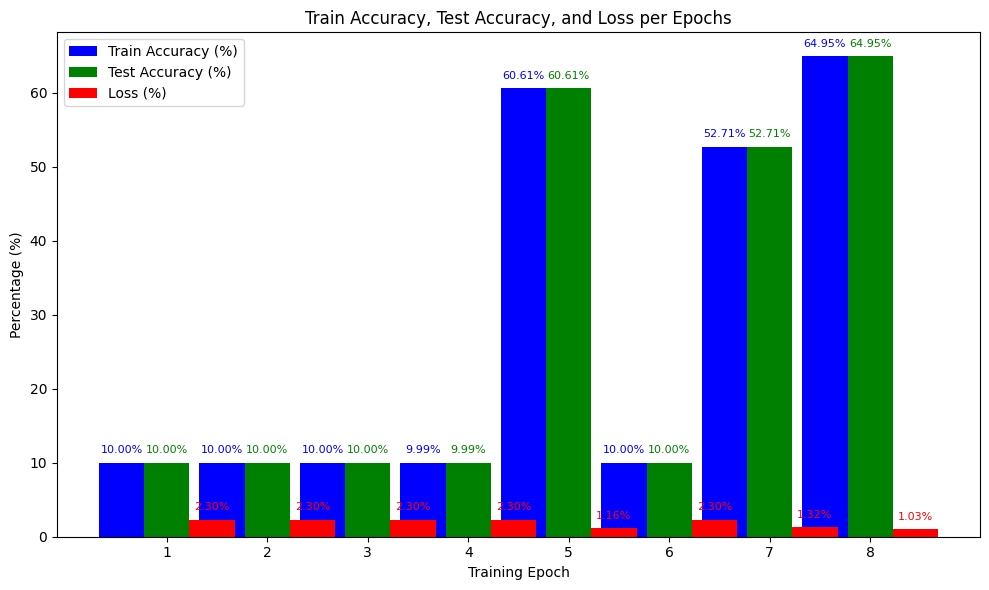

In [ ]:
import matplotlib.pyplot as plt

# Duomenys (duomenys iš visų treniravimų)
train_accuracy_procents = [10.0, 10.0, 10.0, 9.99, 60.61, 10.0, 52.71, 64.95]
test_accuracy_procents = [10.0, 10.0, 10.0, 9.99, 60.61, 10.0, 52.71, 64.95]
loss_procents = [2.3, 2.3, 2.3, 2.3, 1.16, 2.3, 1.32, 1.03]
training_times = [1, 2, 3, 4, 5, 6, 7, 8]

# Sukuriame grafiko objektą (duomenys iš visų treniravimų)
fig, ax = plt.subplots(figsize=(10, 6))

# Stulpelinė diagrama su Train Accuracy, Test Accuracy ir Loss (duomenys iš visų treniravimų)
bar_width = 0.45  # Barų plotis
index = range(len(training_times))  # x-asis reikšmės

# Stulpeliai Train Accuracy, Test Accuracy ir Loss (duomenys iš visų treniravimų)
ax.bar(index, train_accuracy_procents, width=bar_width, label='Train Accuracy (%)', color='b', align='center')
ax.bar([i + bar_width for i in index], test_accuracy_procents, width=bar_width, label='Test Accuracy (%)', color='g', align='center')
ax.bar([i + 2 * bar_width for i in index], loss_procents, width=bar_width, label='Loss (%)', color='r', align='center')

# Pridedame ašis ir etiketes
ax.set_xlabel('Training Epoch')
ax.set_ylabel('Percentage (%)')
ax.set_xticks([i + bar_width for i in index])  # Pozicija x ašyje
ax.set_xticklabels(training_times)  # Treniruotės laikai
ax.set_title('Train Accuracy, Test Accuracy, and Loss per Epochs')

# Labeliai aukščiausiems taškams (dabar su paslinkimu ir mažesniu šriftu)
for i in range(len(training_times)):
    # Labeliai Train Accuracy
    ax.text(i, train_accuracy_procents[i] + 1, f'{train_accuracy_procents[i]:.2f}%',
            ha='center', va='bottom', fontsize=8, color='blue', rotation=0, verticalalignment='bottom')

    # Labeliai Test Accuracy
    ax.text(i + bar_width, test_accuracy_procents[i] + 1, f'{test_accuracy_procents[i]:.2f}%',
            ha='center', va='bottom', fontsize=8, color='green', rotation=0, verticalalignment='bottom')

    # Labeliai Loss
    ax.text(i + 2 * bar_width, loss_procents[i] + 1, f'{loss_procents[i]:.2f}%',
            ha='center', va='bottom', fontsize=8, color='red', rotation=0, verticalalignment='bottom')

# Pridėkite legendą
ax.legend()

# Parodome grafiką
plt.tight_layout()
plt.show()


Išvados
Pritaikius Dropout ir Data Augmentation metodus, modelis sugebėjo pasiekti geresnius
rezultatus. Train accuracy pasiekė 64.95%, o nuostoliai
sumažėjo beveik per pusę. Tikėtasi, kad naudojant šiuos metodus modelis geriau generalizuos
ir atsispirs perpratimu